# 1. McCulloch Pitt's Neuron Model

In [14]:
import numpy as np
import pandas as pd

class McCullochPitts():
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights)

        if weighted_sum >= self.threshold:
            return 1
        else:
            return 0

In [15]:
# AND Gate
inputs = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
weights = np.array([1, 1])
threshold = 2
AND_model = McCullochPitts(weights, threshold)
actual_outputs = np.array([0, 0, 0, 1])

for row, actual_op in zip(inputs, actual_outputs):
    output = AND_model.predict(row)
    print(f"Inputs: {row}, Output: {output}, Actual: {actual_op}")

Inputs: [0 0], Output: 0, Actual: 0
Inputs: [0 1], Output: 0, Actual: 0
Inputs: [1 0], Output: 0, Actual: 0
Inputs: [1 1], Output: 1, Actual: 1


In [20]:
# XOR Gate
# XOR(a, b) = a and -b + -a and b

inputs = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
weights1 = np.array([1, -1])
weights2 = np.array([-1, 1])
weights3 = np.array([1, 1])
threshold = 1

neuron1 = McCullochPitts(weights1, threshold)
neuron2 = McCullochPitts(weights2, threshold)
neuron3 = McCullochPitts(weights3, threshold)

for inp in inputs:
    op1 = neuron1.predict(inp)
    op2 = neuron2.predict(inp)
    new_ip = np.array([op1, op2])
    xor_op = neuron3.predict(new_ip)
    print(f"Inputs: {inp}, Intermediate1: {op1}, Intermediate2: {op2}, XOR_output: {xor_op}")

Inputs: [0 0], Intermediate1: 0, Intermediate2: 0, XOR_output: 0
Inputs: [0 1], Intermediate1: 0, Intermediate2: 1, XOR_output: 1
Inputs: [1 0], Intermediate1: 1, Intermediate2: 0, XOR_output: 1
Inputs: [1 1], Intermediate1: 0, Intermediate2: 0, XOR_output: 0


# 2. Perceptron

In [28]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate = 0.01, epochs = 10):
        self.lr = learning_rate
        self.epochs = epochs
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.array([1 if i > 0 else 0 for i in y])
        for _ in range(self.epochs):
            for index, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y_[index] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_op = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_op)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


In [29]:
# AND Gate

if __name__ == '__main__':
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])
    perceptron_and = Perceptron(learning_rate=0.1, epochs=20)
    perceptron_and.fit(X_and, y_and)
    for input_data in X_and:
        prediction = perceptron_and.predict(np.array([input_data]))[0]
        print(f"Input: {input_data}, Prediction: {prediction}")
    test_data = np.array([[0.5, 0.2], [1.1, 0.8]])
    predictions = perceptron_and.predict(test_data)
    print(f"\nPredictions for new data {test_data}: {predictions}")

Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1

Predictions for new data [[0.5 0.2]
 [1.1 0.8]]: [0 1]


In [30]:
# OR Gate

if __name__ == '__main__':
    X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_or = np.array([0, 1, 1, 1])
    perceptron_or = Perceptron(learning_rate=0.1, epochs=20)
    perceptron_or.fit(X_or, y_or)
    for input_data in X_or:
        prediction = perceptron_or.predict(np.array([input_data]))[0]
        print(f"Input: {input_data}, Prediction: {prediction}")
    test_data = np.array([[0.5, 0.2], [1.1, 0.8]])
    predictions = perceptron_or.predict(test_data)
    print(f"\nPredictions for new data {test_data}: {predictions}")

Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1

Predictions for new data [[0.5 0.2]
 [1.1 0.8]]: [0 1]


# 3. Adaline

In [40]:
import numpy as np

class Adaline:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.array([1 if i > 0 else -1 for i in y])

        for _ in range(self.epochs):
            linear_output = np.dot(X, self.weights) + self.bias
            errors = (y_ - linear_output)
            self.weights += self.lr * np.dot(X.T, errors) / n_samples
            self.bias += self.lr * np.sum(errors) / n_samples
            cost = np.sum(errors ** 2) / (2 * n_samples)
            self.cost_history.append(cost)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

    def predict_raw(self, X):
        return np.dot(X, self.weights) + self.bias

In [32]:
# AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

adaline_and = Adaline(learning_rate=0.1, epochs=100)
adaline_and.fit(X_and, y_and)

for input_data in X_and:
    prediction = adaline_and.predict(np.array([input_data]))[0]
    raw_output = adaline_and.predict_raw(np.array([input_data]))[0]
    print(f"Input: {input_data}, Prediction: {prediction}, Raw Output: {raw_output:.4f}")

Input: [0 0], Prediction: 0, Raw Output: -1.2295
Input: [0 1], Prediction: 0, Raw Output: -0.4575
Input: [1 0], Prediction: 0, Raw Output: -0.4575
Input: [1 1], Prediction: 1, Raw Output: 0.3144


In [33]:
# OR Gate
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

adaline_or = Adaline(learning_rate=0.1, epochs=100)
adaline_or.fit(X_or, y_or)

for input_data in X_or:
    prediction = adaline_or.predict(np.array([input_data]))[0]
    raw_output = adaline_or.predict_raw(np.array([input_data]))[0]
    print(f"Input: {input_data}, Prediction: {prediction}, Raw Output: {raw_output:.4f}")

Input: [0 0], Prediction: 0, Raw Output: -0.3144
Input: [0 1], Prediction: 1, Raw Output: 0.5291
Input: [1 0], Prediction: 1, Raw Output: 0.5291
Input: [1 1], Prediction: 1, Raw Output: 1.3726


# 4. Madaline

In [51]:
import numpy as np

class Adaline:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        if self.weights is None:
            self.weights = np.zeros(n_features)
        if self.bias is None:
            self.bias = 0
        y_ = np.array([1 if i > 0 else -1 for i in y])

        for _ in range(self.epochs):
            linear_output = np.dot(X, self.weights) + self.bias
            errors = (y_ - linear_output)
            self.weights += self.lr * np.dot(X.T, errors) / n_samples
            self.bias += self.lr * np.sum(errors) / n_samples
            cost = np.sum(errors ** 2) / (2 * n_samples)
            self.cost_history.append(cost)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

    def predict_raw(self, X):
        if self.weights is None:
            return 0  # Or raise an exception:  raise ValueError("Adaline weights are not initialized")
        return np.dot(X, self.weights) + self.bias

class Madaline:
    def __init__(self, num_hidden_nodes, learning_rate=0.01, epochs=100):
        self.num_hidden = num_hidden_nodes
        self.lr = learning_rate
        self.epochs = epochs
        self.hidden_neurons = [Adaline(learning_rate=learning_rate, epochs=epochs) for _ in range(num_hidden_nodes)]
        self.output_weights = np.ones(num_hidden_nodes)
        self.output_bias = 0
        self.cost_history = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        for epoch in range(self.epochs):
            epoch_cost = 0
            for i in range(n_samples):
                xi = X[i]
                ti = 1 if y[i] > 0 else -1

                # Initialize hidden neuron weights if they are None
                for neuron in self.hidden_neurons:
                    if neuron.weights is None:
                        neuron.fit(np.array([xi]), np.array([ti]))  # Give it a single sample to init.

                hidden_outputs = np.array([neuron.predict_raw(np.array([xi])) for neuron in self.hidden_neurons])
                hidden_predictions = np.where(hidden_outputs >= 0, 1, -1)
                output_sum = np.sum(hidden_predictions * self.output_weights) + self.output_bias

                if not isinstance(output_sum, (int, float)):
                    print(f"Error: output_sum is not a number.  output_sum = {output_sum}, hidden_predictions = {hidden_predictions}, output_weights = {self.output_weights}, output_bias = {self.output_bias}")
                    output_sum = 0  # Default to 0 if it's not a number to avoid the TypeError.
                
                network_output = 1 if output_sum >= 0 else -1

                if network_output != ti:
                    if ti == 1:
                        neg_output_neurons_indices = np.where(hidden_predictions == -1)[0]
                        if neg_output_neurons_indices.size > 0:
                            best_neuron_index = neg_output_neurons_indices[np.argmin(hidden_outputs[neg_output_neurons_indices])]
                            self.hidden_neurons[best_neuron_index].fit(np.array([xi]), np.array([1]))
                    elif ti == -1:
                        pos_output_neurons_indices = np.where(hidden_predictions == 1)[0]
                        for neuron_index in pos_output_neurons_indices:
                            self.hidden_neurons[neuron_index].fit(np.array([xi]), np.array([-1]))
                error = ti - output_sum
                sample_cost = error**2 / 2
                epoch_cost += sample_cost

            epoch_cost /= n_samples
            self.cost_history.append(epoch_cost)

    def predict(self, X):
        predictions = []
        for xi in X:
            hidden_outputs = np.array([neuron.predict_raw(np.array([xi])) for neuron in self.hidden_neurons])
            hidden_predictions = np.where(hidden_outputs >= 0, 1, -1)
            output_sum = np.sum(hidden_predictions * self.output_weights) + self.output_bias
            predictions.append(1 if output_sum >= 0 else 0)
        return np.array(predictions)


In [53]:
# XOR Gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create and train the Madaline network
madaline_xor = Madaline(num_hidden_nodes=2, learning_rate=0.1, epochs=500)
madaline_xor.fit(X_xor, y_xor)

# Test the network
print("MADALINE for XOR gate:")
predictions = madaline_xor.predict(X_xor)
for i in range(len(X_xor)):
    print(f"Input: {X_xor[i]}, Predicted: {predictions[i]}, Actual: {y_xor[i]}")
    

MADALINE for XOR gate:
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 1, Actual: 1
Input: [1 0], Predicted: 1, Actual: 1
Input: [1 1], Predicted: 0, Actual: 0


# 5. Back Propagation

In [55]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        """
        Initializes the neural network.

        Args:
            input_size: Number of input neurons.
            hidden_size: Number of neurons in the hidden layer.
            output_size: Number of output neurons.
            learning_rate: The learning rate for weight updates.
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights with small random values
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.bias_hidden = np.zeros((1, self.hidden_size))

        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        """
        Sigmoid activation function.

        Args:
            x: Input to the sigmoid function.

        Returns:
            The sigmoid output.
        """
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """
        Derivative of the sigmoid function.

        Args:
            x: Input to the sigmoid function.

        Returns:
            The derivative of the sigmoid output.
        """
        return x * (1 - x)

    def forward(self, x):
        """
        Performs forward propagation.

        Args:
            x: Input to the network.

        Returns:
            A tuple containing the output of the hidden layer,
            the output of the network, and the input x.  These are
            saved for use in backpropagation.
        """
        self.input_layer_output = x  #shape(1,input_size)
        self.hidden_layer_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden #shape(1,hidden_size)
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input) #shape(1,hidden_size)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output #shape(1,output_size)
        self.output_layer_output = self.sigmoid(self.output_layer_input) #shape(1,output_size)

        return self.hidden_layer_output, self.output_layer_output, x

    def backward(self, y, output, hidden_layer_output, x):
        """
        Performs backpropagation.

        Args:
            y: Target output.
            output: Predicted output.
            hidden_layer_output: Output of the hidden layer.
            x: Input to the network.
        """
        # Calculate the error
        error_output = y - output  # shape(1,output_size)

        # Calculate the gradients
        delta_output = error_output * self.sigmoid_derivative(output) #shape(1,output_size)
        error_hidden = delta_output.dot(self.weights_hidden_output.T) #shape(1,hidden_size)
        delta_hidden = error_hidden * self.sigmoid_derivative(hidden_layer_output) #shape(1,hidden_size)

        # Update weights and biases
        self.weights_hidden_output += hidden_layer_output.T.dot(delta_output) * self.learning_rate #shape(hidden_size, output_size)
        self.bias_output += np.sum(delta_output, axis=0, keepdims=True) * self.learning_rate #shape(1, output_size)
        self.weights_input_hidden += x.T.dot(delta_hidden) * self.learning_rate #shape(input_size, hidden_size)
        self.bias_hidden += np.sum(delta_hidden, axis=0, keepdims=True) * self.learning_rate #shape(1, hidden_size)

    def train(self, X, y, epochs):
        """
        Trains the neural network.

        Args:
            X: Input data.
            y: Target data.
            epochs: Number of training epochs.
        """
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                # Forward propagation
                hidden_output, output, input_x = self.forward(X[i:i+1]) #shape of X[i:i+1] is (1, input_size)
                # Backward propagation
                self.backward(y[i:i+1], output, hidden_output, input_x)

            # Print the cost every 100 epochs
            if (epoch + 1) % 100 == 0:
                predictions = self.predict(X)
                cost = np.mean((y - predictions) ** 2)
                print(f"Epoch {epoch + 1}, Cost: {cost:.4f}")

    def predict(self, X):
        """
        Predicts the output for a given input.

        Args:
            X: Input data.

        Returns:
            The predicted output.
        """
        _, output, _ = self.forward(X)
        return np.round(output)


In [56]:
# XOR Gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create a neural network with 2 input neurons, 2 hidden neurons, and 1 output neuron
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1)

# Train the neural network
nn.train(X, y, epochs=1000)

# Make predictions
predictions = nn.predict(X)
print("Predictions:")
print(predictions)

Epoch 100, Cost: 0.5000
Epoch 200, Cost: 0.5000
Epoch 300, Cost: 0.5000
Epoch 400, Cost: 0.5000
Epoch 500, Cost: 0.5000
Epoch 600, Cost: 0.7500
Epoch 700, Cost: 0.5000
Epoch 800, Cost: 0.5000
Epoch 900, Cost: 0.5000
Epoch 1000, Cost: 0.5000
Predictions:
[[0.]
 [1.]
 [0.]
 [1.]]


# 6. Primitive operations on classicals sets 

In [57]:
set1 = {1, 2, 3, 4, 5}
set2 = {4, 5, 6, 7, 8}

union_result = set1.union(set2)
print(f"Union: {union_result}")

intersection_result = set1.intersection(set2)
print(f"Intersection: {intersection_result}")

difference_result1 = set1.difference(set2)
difference_result2 = set2.difference(set1)
print(f"Difference (set1 - set2): {difference_result1}")
print(f"Difference (set2 - set1): {difference_result2}")

symmetric_difference_result = set1.symmetric_difference(set2)
print(f"Symmetric Difference: {symmetric_difference_result}")

Union: {1, 2, 3, 4, 5, 6, 7, 8}
Intersection: {4, 5}
Difference (set1 - set2): {1, 2, 3}
Difference (set2 - set1): {8, 6, 7}
Symmetric Difference: {1, 2, 3, 6, 7, 8}


# 7. Primitive operations on fuzzy sets

In [64]:
A = dict()
B= dict()
Y = dict()
Z= dict()
A={"A":0.2, "B":0.3 ,"C":0.6,"D":0.6}
B={"A":0.9, "B":0.9 ,"C":0.4,"D":0.5}
print('The 1st Fuzzy Set is :', A)
print('The 2nd Fuzzy Set is:', B)

#union
for A_key, B_key in zip(A, B):
    if A[A_key ]>B[B_key]:
        Y[A_key ]=A[A_key]
    else:
        Y[B_key]=B[B_key]
print('\nFuzzy Set Union is :', Y)

#intersection
for A_key, B_key in zip(A, B):
    if A[A_key] < B[B_key]:
        Y[A_key ]=A[A_key]
    else:
        Y[B_key]=B[B_key]
        print('\nFuzzy Set Intersection is :', Y)

# Complement
for A_key in A:
    Y[A_key] = round(1 - A[A_key], 2)
    Z[A_key] = round(1 - B[A_key], 2)
    print('\nFuzzy Set Complement of A:', Y)
    print('\nFuzzy Set Complement of B:', Z)

# Difference
for A_key, B_key in zip(A, B):
    if A[A_key]<(1-B[B_key]):
        Y[A_key]= round(A[A_key], 2)
    else:
        Y[B_key] = round(1-B[B_key], 2)
        print('\nFuzzy Set Difference is :', Y)

The 1st Fuzzy Set is : {'A': 0.2, 'B': 0.3, 'C': 0.6, 'D': 0.6}
The 2nd Fuzzy Set is: {'A': 0.9, 'B': 0.9, 'C': 0.4, 'D': 0.5}

Fuzzy Set Union is : {'A': 0.9, 'B': 0.9, 'C': 0.6, 'D': 0.6}

Fuzzy Set Intersection is : {'A': 0.2, 'B': 0.3, 'C': 0.4, 'D': 0.6}

Fuzzy Set Intersection is : {'A': 0.2, 'B': 0.3, 'C': 0.4, 'D': 0.5}

Fuzzy Set Complement of A: {'A': 0.8, 'B': 0.3, 'C': 0.4, 'D': 0.5}

Fuzzy Set Complement of B: {'A': 0.1}

Fuzzy Set Complement of A: {'A': 0.8, 'B': 0.7, 'C': 0.4, 'D': 0.5}

Fuzzy Set Complement of B: {'A': 0.1, 'B': 0.1}

Fuzzy Set Complement of A: {'A': 0.8, 'B': 0.7, 'C': 0.4, 'D': 0.5}

Fuzzy Set Complement of B: {'A': 0.1, 'B': 0.1, 'C': 0.6}

Fuzzy Set Complement of A: {'A': 0.8, 'B': 0.7, 'C': 0.4, 'D': 0.4}

Fuzzy Set Complement of B: {'A': 0.1, 'B': 0.1, 'C': 0.6, 'D': 0.5}

Fuzzy Set Difference is : {'A': 0.1, 'B': 0.7, 'C': 0.4, 'D': 0.4}

Fuzzy Set Difference is : {'A': 0.1, 'B': 0.1, 'C': 0.4, 'D': 0.4}

Fuzzy Set Difference is : {'A': 0.1, 'B':

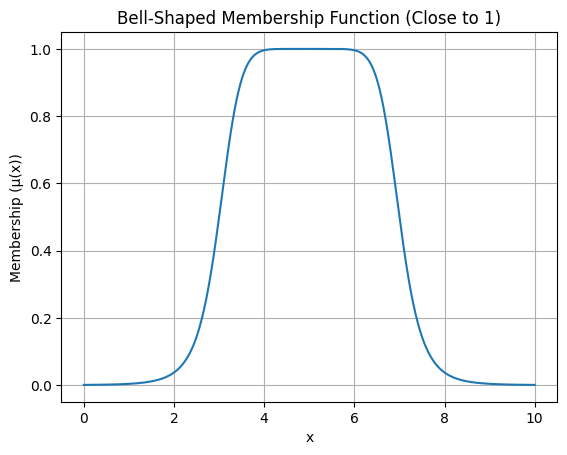

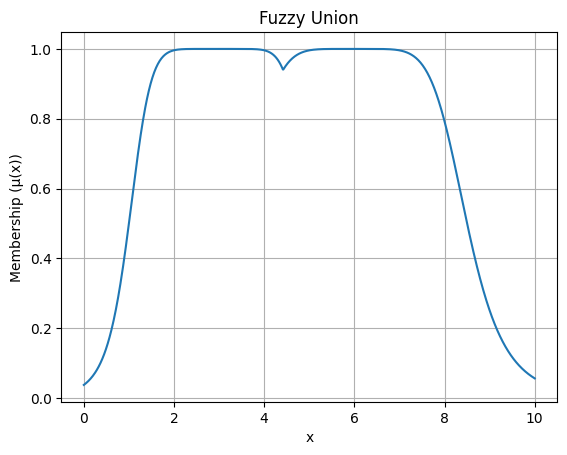

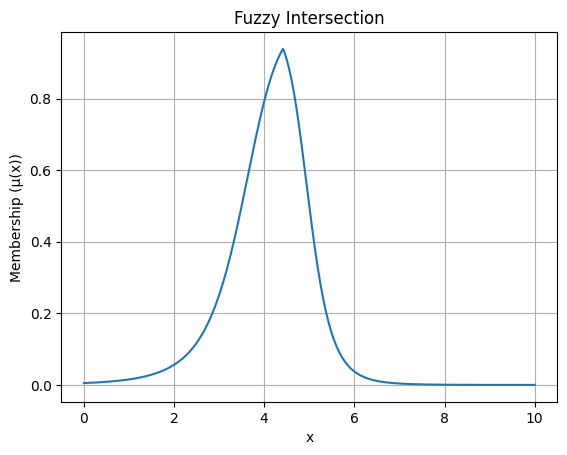

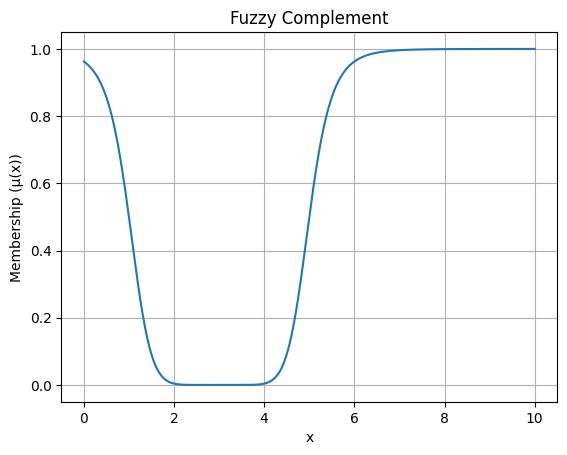

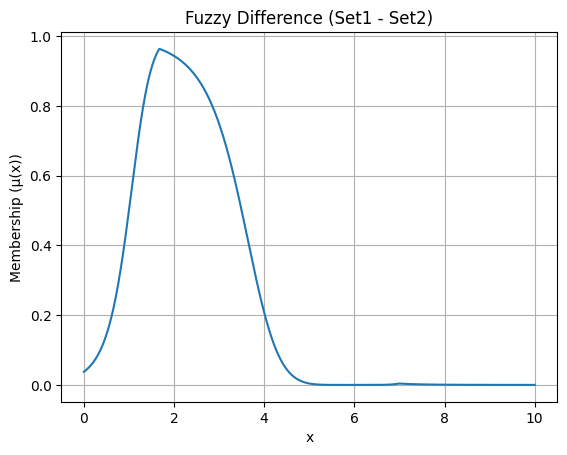

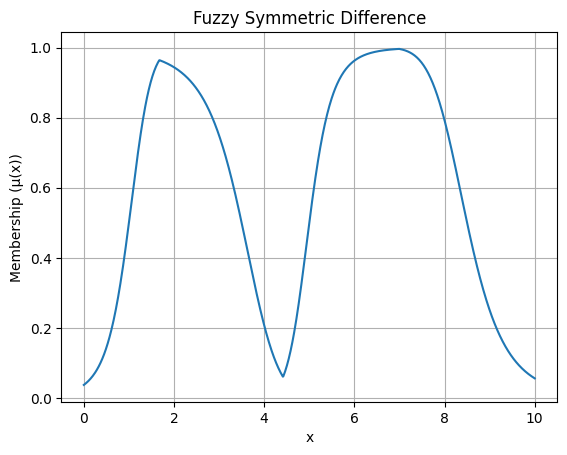

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fuzzy_set(x, membership, title):
    plt.plot(x, membership)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Membership (μ(x))')
    plt.grid(True)
    plt.show()

def bell_shaped_membership(x, a, b, c):
    return 1 / (1 + np.abs((x - c) / a)**(2 * b))

def fuzzy_union(set1, set2):
    return np.maximum(set1, set2)

def fuzzy_intersection(set1, set2):
    return np.minimum(set1, set2)

def fuzzy_complement(set1):
    return 1 - set1

def fuzzy_difference(set1, set2):
    return np.minimum(set1, fuzzy_complement(set2))

def fuzzy_symmetric_difference(set1, set2):
    return fuzzy_union(fuzzy_difference(set1, set2), fuzzy_difference(set2, set1))

if __name__ == "__main__":
    x = np.linspace(0, 10, 1000)
    a = 2
    b = 4
    c = 5
    membership_values = bell_shaped_membership(x, a, b, c)
    plot_fuzzy_set(x, membership_values, "Bell-Shaped Membership Function (Close to 1)")
    
    fuzzy_set1 = bell_shaped_membership(x, 2, 4, 3)
    fuzzy_set2 = bell_shaped_membership(x, 2.5, 3, 6)
    
    union_result = fuzzy_union(fuzzy_set1, fuzzy_set2)
    intersection_result = fuzzy_intersection(fuzzy_set1, fuzzy_set2)
    complement_result = fuzzy_complement(fuzzy_set1)
    difference_result = fuzzy_difference(fuzzy_set1, fuzzy_set2)
    symmetric_difference_result = fuzzy_symmetric_difference(fuzzy_set1, fuzzy_set2)
    
    plot_fuzzy_set(x, union_result, "Fuzzy Union")
    plot_fuzzy_set(x, intersection_result, "Fuzzy Intersection")
    plot_fuzzy_set(x, complement_result, "Fuzzy Complement")
    plot_fuzzy_set(x, difference_result, "Fuzzy Difference (Set1 - Set2)")
    plot_fuzzy_set(x, symmetric_difference_result, "Fuzzy Symmetric Difference")


# 8. Maximize f(x1+x2) = 4x1 + 3x2 using genetic algorithm

In [72]:
import random

def objective_function(x1, x2):
    """Calculates the objective function value: 4*x1 + 3*x2."""
    return 4 * x1 + 3 * x2

def fitness_function(x1, x2):
    """Calculates the fitness value.  For maximization, fitness is the same as the objective."""
    return objective_function(x1, x2)

def select_parent(population, fitness_values):
    """Selects a parent using roulette wheel selection."""
    total_fitness = sum(fitness_values)
    probabilities = [f / total_fitness for f in fitness_values]
    cumulative_probabilities = [sum(probabilities[:i + 1]) for i in range(len(probabilities))]
    r = random.random()
    for i, c in enumerate(cumulative_probabilities):
        if c >= r:
            return population[i]
    return population[-1]

def crossover(parent1, parent2, crossover_rate=0.7):
    """Performs single-point crossover with a given probability."""
    if random.random() < crossover_rate:
        pt = random.randint(0, len(parent1) - 1)
        child1 = parent1[:pt] + parent2[pt:]
        child2 = parent2[:pt] + parent1[pt:]
        return child1, child2
    else:
        return parent1, parent2

def mutate(individual, mutation_rate=0.01, x1_min=-10, x1_max=10, x2_min=-10, x2_max=10):
    """Mutates an individual with a given probability."""
    mutated_individual = list(individual)
    if random.random() < mutation_rate:
        mutated_individual[0] = random.uniform(x1_min, x1_max)  # Mutate x1
    if random.random() < mutation_rate:
        mutated_individual[1] = random.uniform(x2_min, x2_max)  # Mutate x2
    return mutated_individual

def genetic_algorithm(population_size=100, generations=200, crossover_rate=0.7, mutation_rate=0.01,
                      x1_min=-10, x1_max=10, x2_min=-10, x2_max=10):
    """
    Implements a genetic algorithm to maximize the function f(x1, x2) = 4*x1 + 3*x2.
    Prints generation, best result, and final result.
    """
    # Initialize population with (x1, x2) pairs
    population = [(random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)) for _ in range(population_size)]
    best_solution = None
    best_fitness = float('-inf')  # Initialize for maximization

    for generation in range(generations):
        fitness_values = [fitness_function(x1, x2) for x1, x2 in population]

        # Find the best individual in the current generation
        current_best_index = max(range(population_size), key=lambda i: fitness_values[i])
        current_best_solution = population[current_best_index]
        current_best_fitness = fitness_values[current_best_index]

        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_solution = current_best_solution

        # Selection
        selected_parents = [select_parent(population, fitness_values) for _ in range(population_size)]

        # Crossover and Mutation
        new_population = []
        for i in range(0, population_size, 2):
            parent1 = selected_parents[i % len(selected_parents)]
            parent2 = selected_parents[(i + 1) % len(selected_parents)]
            child1, child2 = crossover(parent1, parent2, crossover_rate)
            new_population.append(mutate(child1, mutation_rate, x1_min, x1_max, x2_min, x2_max))
            new_population.append(mutate(child2, mutation_rate, x1_min, x1_max, x2_min, x2_max))
        population = new_population

        # Print generation and best result
        print(f"Generation {generation + 1}: Best solution = {current_best_solution}, Best fitness = {current_best_fitness:.4f}")

    return best_solution, best_fitness


if __name__ == "__main__":
    # Define the problem parameters
    x1_min = -10
    x1_max = 10
    x2_min = -10
    x2_max = 10
    population_size = 300 # Changed to 300
    generations = 4 # Changed to 4

    # Run the genetic algorithm
    best_solution, best_fitness = genetic_algorithm(population_size, generations,
                                                     x1_min=x1_min, x1_max=x1_max,
                                                     x2_min=x2_min, x2_max=x2_max)

    # Print the final result
    print("\nFinal Best Solution (x1, x2):", best_solution)
    print("Final Best Fitness:", best_fitness)


Generation 1: Best solution = (9.320644908925882, 7.63732439285933), Best fitness = 60.1946
Generation 2: Best solution = [8.98665317656759, 9.791264912967566], Best fitness = 65.3204
Generation 3: Best solution = [9.227656578669084, 9.791264912967566], Best fitness = 66.2844
Generation 4: Best solution = [9.227656578669084, 9.791264912967566], Best fitness = 66.2844

Final Best Solution (x1, x2): [9.227656578669084, 9.791264912967566]
Final Best Fitness: 66.28442105357904


# 10. Minimize f(x)=x**2 using genetic algorithm

In [65]:
import random
import math

def objective_function(x):
    """Calculates the objective function value (x^2)."""
    return x**2

def fitness_function(x):
    """Calculates the fitness value (1/(1 + objective_function(x)))."""
    return 1 / (1 + objective_function(x))

def select_parent(population, fitness_values):
    """Selects a parent using roulette wheel selection."""
    total_fitness = sum(fitness_values)
    probabilities = [f / total_fitness for f in fitness_values]
    cumulative_probabilities = [sum(probabilities[:i + 1]) for i in range(len(probabilities))]
    r = random.random()
    for i, c in enumerate(cumulative_probabilities):
        if c >= r:
            return population[i]
    return population[-1]  # Fallback, should rarely happen

def crossover(parent1, parent2, crossover_rate=0.25):
    """Performs single-point crossover with a given probability."""
    if random.random() < crossover_rate:
        pt = random.randint(0, len(parent1) - 2)  # Ensure at least one element in each part
        child1 = parent1[:pt + 1] + parent2[pt + 1:]
        child2 = parent2[:pt + 1] + parent1[pt + 1:]
        return child1, child2
    else:
        return parent1, parent2

def mutate(individual, mutation_rate=0.1, mutation_range=30):
    """Mutates an individual with a given probability."""
    mutated_individual = list(individual)  # Create a mutable copy
    for i in range(len(mutated_individual)):
        if random.random() < mutation_rate:
            mutated_individual[i] = random.randint(0, mutation_range)
    return mutated_individual

def genetic_algorithm(population_size=6, chromosome_length=4, generations=10, crossover_rate=0.25, mutation_rate=0.1, mutation_range=30):
    """Implements a genetic algorithm to minimize the objective function x^2."""

    # Initialize population
    population = [[random.randint(0, mutation_range) for _ in range(chromosome_length)] for _ in range(population_size)]
    best_solution = None
    best_fitness = float('inf')  # Initialize with a very large value for minimization

    for generation in range(generations):
        objective_values = [objective_function(sum(individual)) for individual in population]  # Sum of genes
        fitness_values = [fitness_function(sum(individual)) for individual in population]

        # Find the best individual in the current generation
        current_best_index = min(range(population_size), key=lambda i: objective_values[i]) #index of minimum objective value
        current_best_solution = population[current_best_index]
        current_best_objective = objective_values[current_best_index]

        if current_best_objective < best_fitness:
            best_fitness = current_best_objective
            best_solution = current_best_solution
            print(f"Generation {generation + 1}: Best solution = {best_solution}, Best objective = {best_fitness:.4f}")

        # Selection
        selected_parents = [select_parent(population, fitness_values) for _ in range(population_size)]

        # Crossover and Mutation
        new_population = []
        for i in range(0, population_size, 2):
            parent1 = selected_parents[i % len(selected_parents)]
            parent2 = selected_parents[(i + 1) % len(selected_parents)]
            child1, child2 = crossover(parent1, parent2, crossover_rate)
            new_population.append(mutate(child1, mutation_rate, mutation_range))
            new_population.append(mutate(child2, mutation_rate, mutation_range))
        population = new_population

    return best_solution, best_fitness



if __name__ == "__main__":
    best_solution, best_objective = genetic_algorithm()
    print(f"\nFinal Best Solution: {best_solution}")
    print(f"Final Best Objective Value: {best_objective:.4f}")


Generation 1: Best solution = [9, 2, 27, 7], Best objective = 2025.0000
Generation 2: Best solution = [9, 2, 20, 7], Best objective = 1444.0000
Generation 5: Best solution = [3, 2, 20, 7], Best objective = 1024.0000
Generation 7: Best solution = [3, 2, 14, 7], Best objective = 676.0000
Generation 8: Best solution = [3, 2, 12, 5], Best objective = 484.0000

Final Best Solution: [3, 2, 12, 5]
Final Best Objective Value: 484.0000
